In [1]:

import scipy
from scipy import stats


import numpy as np
import matplotlib as mpl

## agg backend is used to create plot as a .png file
#mpl.use('agg')

import matplotlib.pyplot as plt 


from wikipedia2vec import Wikipedia2Vec

np.random.seed(1)
vectorDim = 100

numNode = 100

#inputDataTraining = np.load('./trainingData_averaging/inputDataTraining_4k_average.npy')
#outputDataTraining = np.load('./trainingData_averaging/outputDataTraining_4k_average.npy')


In [2]:
wiki2vec = Wikipedia2Vec.load('enwiki_20180420_100d.pkl')

related_1 = ['vein', 'baker', 'leg', 'dark', 'building', 'insane', 'storm', 'left', 'sailor', 'leader', 'ball', 'day', 'coast', 'bed', 'long', 'shark', 'glory', 'animal', 'green', 'law', 'village', 'throw', 'threshold', 'alive','star', 'repent', 'answer', 'chilly', 'nice', 'dog', 'berry', 'empty', 'male', 'fever', 'halt', 'sweet', 'trembling', 'leek', 'paper', 'window']
related_2 = ['blood', 'bread', 'arm', 'light', 'flat', 'crazy', 'wind', 'right', 'ship', 'boss', 'round', 'night', 'sea', 'sheet', 'short', 'fish', 'fame', 'beast', 'grass', 'justice',   'town'   , 'toss',  'door',       'dead','sky',    'regret', 'question', 'cold', 'sweet', 'cat', 'fruit', 'full', 'female', 'ill', 'wrong','honey', 'shaking', 'vegetables', 'pen', 'pane' ]
unrelated_1 = ['sweat', 'stove', 'dust', 'scarf', 'hungry', 'revenge', 'rig', 'eat', 'target', 'hose', 'youth', 'field', 'tight', 'washing', 'quarter', 'package', 'palace', 'times', 'mess', 'monk', 'nation', 'cake', 'platform', 'record', 'panic', 'love', 'hairdresser', 'lock', 'word', 'jelly',   'skull','farmer','rot', 'set',   'rock','put','mist','sound','box','kilo']
unrelated_2 = ['text', 'sports', 'safe', 'ground', 'bush', 'lip', 'wall', 'mail', 'belly', 'failure', 'battery', 'gray', 'point', 'bike', 'family', 'roof', 'monkey', 'child', 'wolf', 'stairs',      'bowl', 'slow', 'sprayer',   'nose',   'blouse', 'sphere', 'more',   'out',  'pocket',  'language', 'taxi', 'cry', 'free', 'purse', 'fit', 'spot','leak','dress','stitch','minute']

for num in range(len(related_1)):
    print(' %i - Related (%s, %s);    Unrelated (%s, %s)' % (num, related_1[num], related_2[num], unrelated_1[num], unrelated_2[num]))


 0 - Related (vein, blood);    Unrelated (sweat, text)
 1 - Related (baker, bread);    Unrelated (stove, sports)
 2 - Related (leg, arm);    Unrelated (dust, safe)
 3 - Related (dark, light);    Unrelated (scarf, ground)
 4 - Related (building, flat);    Unrelated (hungry, bush)
 5 - Related (insane, crazy);    Unrelated (revenge, lip)
 6 - Related (storm, wind);    Unrelated (rig, wall)
 7 - Related (left, right);    Unrelated (eat, mail)
 8 - Related (sailor, ship);    Unrelated (target, belly)
 9 - Related (leader, boss);    Unrelated (hose, failure)
 10 - Related (ball, round);    Unrelated (youth, battery)
 11 - Related (day, night);    Unrelated (field, gray)
 12 - Related (coast, sea);    Unrelated (tight, point)
 13 - Related (bed, sheet);    Unrelated (washing, bike)
 14 - Related (long, short);    Unrelated (quarter, family)
 15 - Related (shark, fish);    Unrelated (package, roof)
 16 - Related (glory, fame);    Unrelated (palace, monkey)
 17 - Related (animal, beast);    Un

In [3]:
related_data = np.empty(len(related_1))
print(related_data.shape)

unrelated_data = np.empty(len(related_1))
print(unrelated_data.shape)


(40,)
(40,)


In [4]:
# calculate cosines for related and unrelated pairs 
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

related_data = []
unrelated_data = []

print('\nRelated:')
for num in range(len(related_1)):
    cos_val = cos_sim(wiki2vec.get_word_vector(related_1[num]), wiki2vec.get_word_vector(related_2[num]))
    #print('cos(%s, %s)=%f' % (related_1[num], related_2[num], cos_val))
    related_data = np.append(related_data, cos_val)
    
#for num in range(len(related_1)):
#    print('%f' % (cos_sim(wiki2vec.get_word_vector(related_1[num]), wiki2vec.get_word_vector(related_2[num]))))
    
print(related_data)    

print('\nUnRelated:')
for num in range(len(related_1)):
    cos_val = cos_sim(wiki2vec.get_word_vector(unrelated_1[num]), wiki2vec.get_word_vector(unrelated_2[num]))
    #print('cos(%s, %s)=%f' % (unrelated_1[num], unrelated_2[num], cos_val))
    unrelated_data = np.append(unrelated_data, cos_val)
    
#for num in range(len(related_1)):
#    print('%f' % (cos_sim(wiki2vec.get_word_vector(unrelated_1[num]), wiki2vec.get_word_vector(unrelated_2[num]))))
    
print(unrelated_data)




Related:
[0.54021919 0.24521253 0.62371308 0.65960938 0.32978868 0.63682491
 0.66409403 0.79203159 0.5983727  0.54192799 0.44755122 0.68336695
 0.63758808 0.41743669 0.80054861 0.73060858 0.48708543 0.5251919
 0.53137261 0.57125604 0.79754204 0.61858952 0.3097086  0.8303802
 0.63964367 0.58578187 0.85999995 0.65955192 0.53271264 0.82864267
 0.52149147 0.48022509 0.86066598 0.56123656 0.39253098 0.74972272
 0.6382826  0.50186133 0.54443496 0.67921132]

UnRelated:
[0.16550966 0.25252205 0.34219187 0.30034477 0.35591796 0.15140808
 0.27670354 0.25218886 0.37938392 0.29999682 0.22885603 0.33902237
 0.42256662 0.34386122 0.1885141  0.43581584 0.27178124 0.21971057
 0.22462827 0.34661207 0.37786126 0.32366186 0.27968526 0.25411439
 0.22353217 0.38484028 0.23957194 0.36123681 0.31169209 0.15886553
 0.10483727 0.29966152 0.26842314 0.34965166 0.26909333 0.34067267
 0.45275849 0.26196206 0.39336237 0.35749194]


In [5]:
for num in range(len(related_1)):
    related_data[num] = 1 - related_data[num]
    unrelated_data[num] = 1 - unrelated_data[num]
    
print(related_data)
print(unrelated_data)

[0.45978081 0.75478747 0.37628692 0.34039062 0.67021132 0.36317509
 0.33590597 0.20796841 0.4016273  0.45807201 0.55244878 0.31663305
 0.36241192 0.58256331 0.19945139 0.26939142 0.51291457 0.4748081
 0.46862739 0.42874396 0.20245796 0.38141048 0.6902914  0.1696198
 0.36035633 0.41421813 0.14000005 0.34044808 0.46728736 0.17135733
 0.47850853 0.51977491 0.13933402 0.43876344 0.60746902 0.25027728
 0.3617174  0.49813867 0.45556504 0.32078868]
[0.83449034 0.74747795 0.65780813 0.69965523 0.64408204 0.84859192
 0.72329646 0.74781114 0.62061608 0.70000318 0.77114397 0.66097763
 0.57743338 0.65613878 0.8114859  0.56418416 0.72821876 0.78028943
 0.77537173 0.65338793 0.62213874 0.67633814 0.72031474 0.74588561
 0.77646783 0.61515972 0.76042806 0.63876319 0.68830791 0.84113447
 0.89516273 0.70033848 0.73157686 0.65034834 0.73090667 0.65932733
 0.54724151 0.73803794 0.60663763 0.64250806]


In [6]:
data_to_plot = [unrelated_data, related_data]

In [7]:
print(stats.ttest_ind(related_data,unrelated_data))
print(np.mean(related_data))
print(np.mean(unrelated_data))

Ttest_indResult(statistic=-11.343150550760631, pvalue=3.550424192811426e-18)
0.39859959334135053
0.7047372024506331


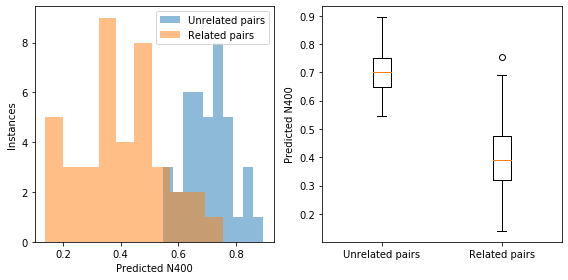

In [8]:
#fig= plt.figure(figsize=(12,5))

fig = plt.figure(1, figsize=(8,4))
#fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(122)
plt.ylabel('Predicted N400')


# Create the boxplot
bp = ax.boxplot(data_to_plot)

ax.set_xticklabels(['Unrelated pairs', 'Related pairs'])
fig.tight_layout()
#plt.savefig('pairs-chwilla1995.png')
#plt.show()

# Cut your window in 1 row and 2 columns, and start a plot in the first part
plt.subplot(121)

plt.hist(unrelated_data, 10, alpha=0.5, label='Unrelated pairs')
plt.hist(related_data, 10, alpha=0.5, label='Related pairs')

# Add title and axis names
# plt.title('Before Discourse')
plt.xlabel('Predicted N400')
plt.ylabel('Instances')
plt.legend(loc='best')
#plt.xlim(0.40, 0.67)
#plt.ylim(0, 18)
 

plt.tight_layout() 
# Show the graph
plt.savefig('ChwillaPairsBOXandHistogramN400-R1.png', dpi=1200)
#fig.savefig('myimage.svg', format='svg', dpi=1200)
plt.show()

In [ ]:
print('t-test: for A vs B: ', stats.ttest_rel(related_data, unrelated_data))

In [52]:
A = wiki2vec.get_word_vector('vein')
B = wiki2vec.get_word_vector('blood')
C = wiki2vec.get_word_vector('sweat')
D = wiki2vec.get_word_vector('text')
E = wiki2vec.get_word_vector('love')
F = wiki2vec.get_word_vector('love')



In [53]:
print('Cosine similarity: LOVE IN LOVE blood = %f' % (cos_sim(E,F)))

Cosine similarity: LOVE IN LOVE blood = 1.000000


In [23]:
print(A.shape)

print('Cosine similarity: vein blood = %f' % (cos_sim(A,B)))
print('Cosine similarity: sweat text = %f' % (cos_sim(C, D)))


print(A)

(100,)
Cosine similarity: vein blood = 0.540219
Cosine similarity: sweat text = 0.165510
[-0.11523566 -0.07138329  0.23437881 -0.41222918 -0.3435264   0.12536035
 -0.14288807 -0.21509169 -0.3033175  -0.6419192   0.36792457 -0.6091833
 -0.15939794 -0.05349047  0.17312758 -0.14161095  0.0253493  -0.21527639
  0.13120551 -0.17503566  0.7668354   0.457386    0.23714018  0.39326274
 -0.02359945 -0.50710183  0.0207572  -0.6540611  -0.14119591  0.26126978
  0.70521665  0.38280037  0.46906805  0.7840241   0.14346667 -0.13202927
 -0.18487884 -0.0204697   0.36225292  0.72726893 -0.44244727  0.44130686
 -0.13265483  0.9260791   0.39822283  0.05820033 -0.25023964  0.3232318
  0.3591406   0.16796349 -0.02544534 -0.20451292  0.4156972   0.13964319
  0.42388356 -0.16045046  0.08849539 -0.17640752 -0.6163692  -0.21361028
 -0.54837465 -0.890236   -0.02160041  0.4506246   0.61398464 -0.04501904
 -0.7655504  -0.5323511  -0.21407816 -0.27845386 -0.00568165 -0.1041735
  0.51185507 -0.43634188 -0.37840542  